In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("bank_marketing_updated_v1.csv")
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [3]:
#read the file in inp0 without first two rows as it is of no use.
inp0=pd.read_csv("bank_marketing_updated_v1.csv", skiprows= 2)
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
#drop the customer id as it is of no use.
inp0.drop("customerid", axis=1, inplace=True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0.jobedu.apply(lambda x: x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [6]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']=inp0.jobedu.apply(lambda x: x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [7]:
#drop the "jobedu" column from the dataframe.
inp0.drop('jobedu',axis= 1, inplace= True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [8]:
inp0[inp0.month.apply(lambda x: isinstance(x,float))== True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


In [9]:
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [10]:
#count the missing values in age column.
inp0.age.isnull().sum()

20

In [11]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

In [12]:
#calculate the percentage of missing values in age column.
float(100.0*20/45211)

0.04423702196368141

In [13]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1=inp0[-inp0.age.isnull()].copy()
inp1.shape

(45191, 19)

In [14]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [15]:
#print the percentage of each month in the data frame inp1.
float(100.0*50/45191)

0.11064149941360005

In [16]:
#find the mode of month in inp1
month_mode=inp1.month.mode()[0]
month_mode

'may, 2017'

In [17]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode, inplace= True)
inp1.month.value_counts(normalize= True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [18]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

In [19]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [20]:
#calculate the percentage of missing values in response column.
float(100.0*30/45191)

0.06638489964816004

In [21]:
#drop the records with response missings in inp1.
inp1= inp1[~inp1.response.isnull()]
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [22]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [23]:
#describe the pdays column with considering the -1 values.
inp1.loc[inp1.pdays<0,"pdays"]=np.NaN
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [24]:
#defining the map function
def binary_map(x):
    return x.map({"Yes":1,"No":0})

In [25]:
inp1['response_flag']=inp1['response'].map({"yes":1,"no":0})

# Education vs marital vs response

In [26]:
res=pd.pivot_table(data=inp1, index="education", columns="marital",values='response_flag')
res

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


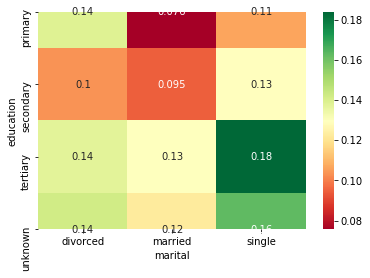

In [27]:
#create heat map of education vs marital vs response_flag
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

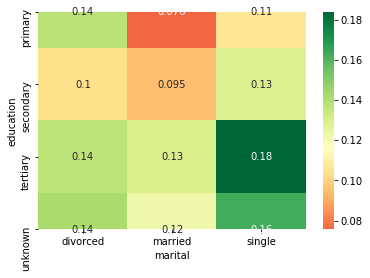

In [28]:
sns.heatmap(res, annot= True, cmap="RdYlGn", center= 0.117)
plt.show()

# Job vs marital vs response

In [29]:
res=pd.pivot_table(data=inp1, index="job", columns="marital",values="response_flag")
res

marital,divorced,married,single
job,,,
admin.,0.120160,0.113383,0.136153
blue-collar,0.077644,0.062778,0.105760
entrepreneur,0.083799,0.075843,0.113924
housemaid,0.097826,0.072527,0.166667
management,0.127928,0.126228,0.162254
retired,0.283688,0.220682,0.120370
self-employed,0.158273,0.079637,0.191874
services,0.091241,0.074105,0.117696
student,0.166667,0.185185,0.293850


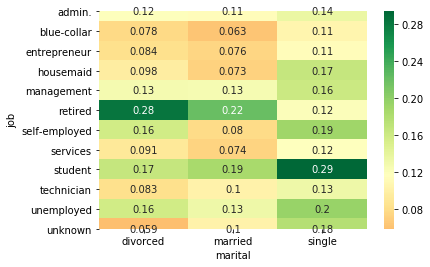

In [30]:
#create the heat map of Job vs marital vs response_flag.
sns.heatmap(res, annot= True, cmap="RdYlGn", center= 0.117)
plt.show()

# Education vs poutcome vs response

In [31]:
#create the heat map of education vs poutcome vs response_flag.
res=pd.pivot_table(data=inp1, index="education", columns="poutcome",values="response_flag")

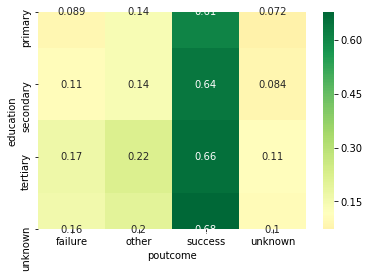

In [32]:
sns.heatmap(res, annot= True, cmap="RdYlGn", center= 0.117)
plt.show()

In [33]:
inp1[inp1.pdays>0].response_flag.mean()

0.2307785593014795

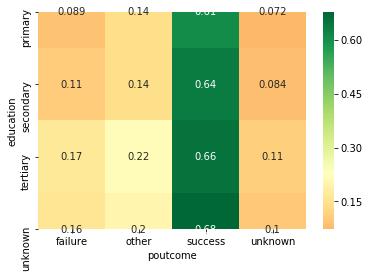

In [34]:
res=pd.pivot_table(data=inp1, index="education", columns="poutcome",values="response_flag")
sns.heatmap(res, annot= True, cmap="RdYlGn", center= 0.2308)
plt.show()